> # Introduction

In this study; first, I will try to analysis and visualize the Heart Diseases UCI data we have. Then I will try to diagnose the patient or not by using different ML algorithms on the data. And finally, I will compare the results I got from the different algorithms I used.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


> # Read Data

In [2]:
data=pd.read_csv('../input/heart-disease-uci/heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Attribute Information in Data:**

- **age:** age of the person 
- **sex:** 0:female and 1:male
- **cp:** chest pain type (4 values)
- **trestbps:** resting blood pressure
- **chol:** serum cholestoral in mg/dl
- **fbs:** fasting blood sugar > 120 mg/dl
- **restecg:** resting electrocardiographic results (values 0,1,2)
- **thalach:** maximum heart rate achieved
- **exang:** exercise induced angina
- **oldpeak:** ST depression induced by exercise relative to rest
- **slope:** the slope of the peak exercise ST segment
- **ca:** number of major vessels (0-3) colored by flourosopy
- **thal:** 3 = normal; 6 = fixed defect; 7 = reversable defect

> # Data Preprocessing

In [5]:
x_data=(data.drop(["target"],axis=1))
y_data=data.target

In [6]:
#scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_data_scaled=pd.DataFrame(sc.fit_transform(x_data))
scaled_data=pd.concat([x_data_scaled,y_data],axis=1)
scaled_data.columns=data.columns

> # Data Exploration

In [7]:
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px


**0-) Correlation Map:**

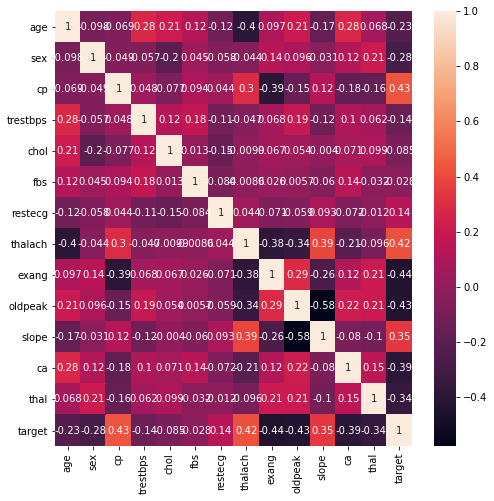

In [8]:
crr=data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(crr,annot=True)
plt.show()

**1-) Total Distribution by Gender**

In [9]:
gender_pie={
  "data": [
    {
      "values": data.sex.value_counts(),
      "labels": ["Female","Male"],
      "domain": {"x": [0, .8],
                "y": [0, .8]},
      "name": "Total Distribution by Gender",
      "hoverinfo":"label+percent+name+value",
      "hole": .1,
      "type": "pie"
    },],
  "layout": {
        #"title":"Population Rate of Regions",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Total Distribution by Gender",
                "x": 0.4,
                "y": 1
            },
        ]
    }
}
    
iplot(gender_pie)

**2-) Age Histogram**

In [10]:
fig = px.histogram(data, x="age",range_x=[29,79],nbins=10)
fig.show()

**3-) Have Heart Disease / not Have**

In [11]:
disease_pie={
  "data": [
    {
      "values": data.target.value_counts(),
      "labels": ["Have heart disease","No heart disease"],
      "domain": {"x": [0, .8],
                "y": [0, .8]},
      "name": " Have Disease / not Have",
      "hoverinfo":"label+percent+name+value",
      "hole": .1,
      "type": "pie"
    },],
  "layout": {
        #"title":"Population Rate of Regions",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": " Have Disease / not Have",
                "x": 0.3,
                "y": 1
            },
        ]
    }
}
    
iplot(disease_pie)

**4-) Gender Distribution of those with Heart Disease**

In [12]:
data_patient=data[data.target==1]
patient_gender_pie={
  "data": [
    {
      "values": data_patient.sex.value_counts(),
      "labels": ["Male","Female"],
      "domain": {"x": [0, .8],
                "y": [0, .8]},
      "name": "Gender Distribution of those with Heart Disease",
      "hoverinfo":"label+percent+name+value",
      "hole": .1,
      "type": "pie"
    },],
  "layout": {
        #"title":"Population Rate of Regions",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Gender Distribution of those with Heart Disease",
                "x": 0.4,
                "y": 1
            },
        ]
    }
}
    
iplot(patient_gender_pie)

**5-) Age Histogram of Those with Heart Disease**

In [13]:
fig = px.histogram(data_patient, x="age",range_x=[29,79])
fig.show()

**6-) Cholesterol Values Swarmplot (Distribution)**

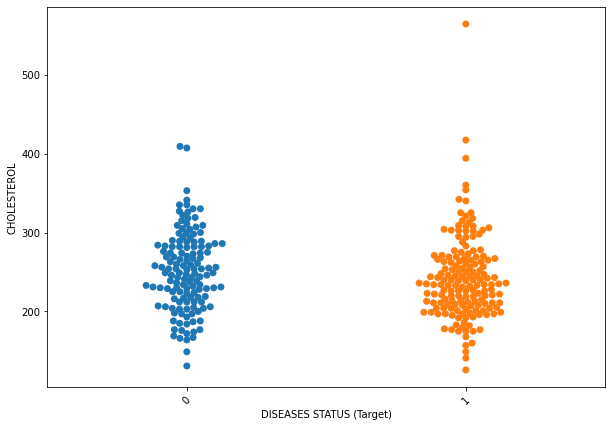

In [14]:
plt.figure(figsize=(10,7))
sns.swarmplot(x='target',y='chol',data=data,size=7)
plt.xticks(rotation=45)
plt.xlabel('DISEASES STATUS (Target)')
plt.ylabel('CHOLESTEROL')
plt.show()

> # Train Test Split

Let's split the data into two for training and testing:

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data, test_size=0.2, random_state=0)


> # Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0)
log_reg.fit(x_train,y_train)
acc_log_reg=log_reg.score(x_test,y_test)*100
print("Test Accuracy = {:.3f} %".format(acc_log_reg))
y_pred_lr=log_reg.predict(x_test)

Test Accuracy = 85.246 %


*Confusion Matrix*

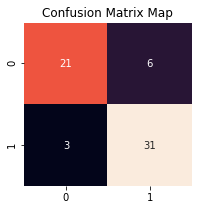

In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
lr_cm=confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(3,3))
plt.title("Confusion Matrix Map")
sns.heatmap(lr_cm,annot=True,cbar=False)
plt.show()

> # Support Vector Machine (SVM)

In [18]:
from sklearn.svm import SVC
svc=SVC(kernel='rbf',random_state=0)
svc.fit(x_train,y_train)
acc_svc=svc.score(x_test,y_test)*100
print("Test Accuracy = {:.3f} %".format(acc_svc))
y_pred_svm=svc.predict(x_test)

Test Accuracy = 86.885 %


*Confusion Matrix*

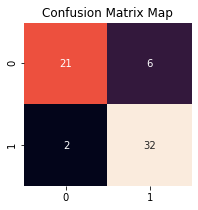

In [19]:
# Confusion Matrix

svm_cm=confusion_matrix(y_test,y_pred_svm)
plt.figure(figsize=(3,3))
plt.title("Confusion Matrix Map")
sns.heatmap(svm_cm,annot=True,cbar=False)
plt.show()

> # Naive Bayes

In [20]:
from sklearn.naive_bayes import BernoulliNB
bnb=BernoulliNB()
bnb.fit(x_train,y_train)
acc_bnb=bnb.score(x_test,y_test)*100
print("Test Accuracy = {:.3f} %".format(acc_bnb))
y_pred_bnb=bnb.predict(x_test)

Test Accuracy = 86.885 %


*Confusion Matrix*

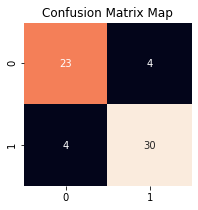

In [21]:
# Confusion Matrix

svm_bnb=confusion_matrix(y_test,y_pred_bnb)
plt.figure(figsize=(3,3))
plt.title("Confusion Matrix Map")
sns.heatmap(svm_bnb,annot=True,cbar=False)
plt.show()

> # K-Nearest Neighbors (K-NN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=8,metric="minkowski")
knn.fit(x_train,y_train)
acc_knn=knn.score(x_test,y_test)*100
print("Test Accuracy = {:.3f} %".format(acc_knn))
y_pred_knn=knn.predict(x_test)

Test Accuracy = 88.525 %


*Confusion Matrix*

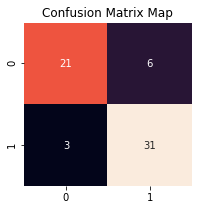

In [23]:
# Confusion Matrix
knn_cm=confusion_matrix(y_test,y_pred_lr)
plt.figure(figsize=(3,3))
plt.title("Confusion Matrix Map")
sns.heatmap(knn_cm,annot=True,cbar=False)
plt.show()

> # Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=0,criterion='entropy',splitter='random')
dtc.fit(x_train,y_train)
acc_dtc=dtc.score(x_test,y_test)*100
print("Test Accuracy = {:.3f} %".format(acc_dtc))
y_pred_dtc=dtc.predict(x_test)

Test Accuracy = 80.328 %


*Confusion Matrix*

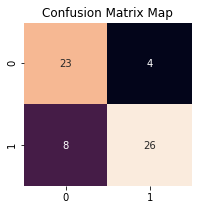

In [25]:
# Confusion Matrix
dtc_cm=confusion_matrix(y_test,y_pred_dtc)
plt.figure(figsize=(3,3))
plt.title("Confusion Matrix Map")
sns.heatmap(dtc_cm,annot=True,cbar=False)
plt.show()

> # Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
acc_rf=rf.score(x_test,y_test)*100
print("Test Accuracy = {:.3f} %".format(acc_rf))
y_pred_rf=rf.predict(x_test)

Test Accuracy = 88.525 %


*Confusion Matrix*

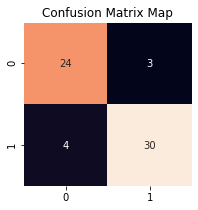

In [27]:
# Confusion Matrix

svm_rf=confusion_matrix(y_test,y_pred_rf)
plt.figure(figsize=(3,3))
plt.title("Confusion Matrix Map")
sns.heatmap(svm_rf,annot=True,cbar=False)
plt.show()

> # Comparing ML Models

In [28]:
from sklearn.metrics import roc_curve, auc

y_preds=[y_pred_lr,y_pred_svm,y_pred_bnb,y_pred_knn,y_pred_dtc,y_pred_rf]

fp_rate=[]
tp_rate=[]
thresholds=[]
roc_auc=[]
for i in y_preds:
    fp,tp,th = roc_curve(y_test, i)
    fp_rate.append(fp)
    tp_rate.append(tp)
    thresholds.append(th)
    roc_auc.append(100*auc(fp,tp))

model_list=["Logistic Regression", "Support Vector Machine", "Naive Bayes","K-NN","Decision Tree","Random Forest"]
accuracy_values=[acc_log_reg,acc_svc,acc_bnb,acc_knn,acc_dtc,acc_rf]

**ROC (Receiver Operating Characteristic) Curves**

In [29]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=[0,1], y=[0,1],
                    mode='lines',
                    line = dict(color='royalblue', width=4, dash='dash')))
for j in range(len(model_list)):
    fig.add_trace(go.Scatter(x=fp_rate[j], y=tp_rate[j],
                    mode='lines+markers',
                    name=model_list[j]))
fig.show()

**Accuracy and AUC (Area Under Curve) Scores**

In [30]:
figbar = go.Figure(data=[
    go.Bar(name='Accuracy', x=model_list, y=accuracy_values),
    go.Bar(name='AUC', x=model_list, y=roc_auc)
])
# Change the bar mode
figbar.update_layout(barmode='group')
figbar.show()